In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import glob
import pickle

gp_drt_dir = '../comparisons/GP-DRT'
if gp_drt_dir not in sys.path:
    sys.path.append(gp_drt_dir)
import GP_DRT as gp
from GP_utils import gp_fit
    
if '../../../../misc_modules' not in sys.path:
    sys.path.append('../../../../misc_modules')
import gamry_tools as gt

%load_ext autoreload
%autoreload 2

reloaded GP_DRT
reloaded GP_utils


In [2]:
def save_pickle(obj, file):
    with open(file,'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print('Dumped pickle to {}'.format(file))
    
def load_pickle(file):
    with open(file,'rb') as f:
        return pickle.load(f)

In [14]:
1/(2*np.pi*1e-7), 1/(2*np.pi*1e2)

(1591549.4309189534, 0.0015915494309189533)

In [13]:
sccm = 24000
gcat = 1
sccm*60/gcat

1440000.0

# Simulated data

In [13]:
# tau for plotting
tau_plot = np.logspace(-7,2,200)
f_plot = 1/(2*np.pi*tau_plot)
start = time.time()
files = glob.glob('../../data/simulated/Z*.csv')
error_files = []
theta0s = [[0.1,0.5,1],[0.1,1.5,2],[0.1,5,1]]
for file in files:
    print(file)
    print('-------------------------')
    suffix = file[file.find('_'):-4]
    file_start = time.time()
    best_path = 'results/for_figs'
    Zoutbest = os.path.join(best_path,f'Zout{suffix}.csv')
    Goutbest = os.path.join(best_path,f'Gout{suffix}.csv')
    pklbest = os.path.join(best_path,f'obj_{suffix}.pkl')
    if os.path.exists(Zoutbest) and os.path.exists(Goutbest) and os.path.exists(pklbest):
        print('Already ran')
    else:
    
        best_fun = np.inf
        for n,theta0 in enumerate(theta0s):
            print('theta0=',theta0)
            respath = 'results/theta0=({},{},{})'.format(theta0[0],theta0[1],theta0[2])
            Zoutfile = os.path.join(respath,f'Zout{suffix}.csv')
            Goutfile = os.path.join(respath,f'Gout{suffix}.csv')
            pkl = os.path.join(respath,f'obj_{suffix}.pkl')
    #         if os.path.exists(Zoutfile) and os.path.exists(Goutfile):
    #             print('Already ran')
    #         else:
            df = pd.read_csv(file)
            # sort ascending
            df = df.sort_values('Freq')
            Z = df['Zreal'].values + 1j*df['Zimag'].values

            try:
                result = gp_fit(df['Freq'].values,Z,theta0=np.array(theta0),freq_star=f_plot,max_iter=20)

                Z_res = pd.DataFrame(np.array([df['Freq'],result['Z_re_fit'],result['Z_im_fit'],result['sigma_Z_im_fit']]).T,
                                     columns=['freq','Zreal','Zimag','sigma_im'])
                g_res = pd.DataFrame(np.array([tau_plot,result['gamma_star'],result['sigma_gamma_star']]).T,
                                     columns=['tau','gamma','sigma_gamma'])
                Z_res.to_csv(Zoutfile,index=False)
                g_res.to_csv(Goutfile,index=False)
                save_pickle(result,pkl)
                # if this theta0 improved the NMLL, write it to for_figs (overwrite existing file)
                if result['min_result']['fun'] < best_fun:
                    best_fun = result['min_result']['fun']
                    Z_res.to_csv(Zoutbest,index=False)
                    g_res.to_csv(Goutbest,index=False)
                    save_pickle(result,pklbest)
            except np.linalg.LinAlgError:
                error_files.append(file)
                print('LinAlgError')
    
        print('File fit time:', time.time()-file_start)
        
print('Total fit time:',time.time()-start)


reloaded GP_utils
../../data/simulated\Z_2RC_Macdonald_0.25.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_Macdonald_1.0.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_Macdonald_2.5.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_noiseless.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_Orazem_0.25.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_Orazem_1.0.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_Orazem_2.5.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_uniform_0.25.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_uniform_1.0.csv
-------------------------
Already ran
../../data/simulated\Z_2RC_uniform_2.5.csv
-------------------------
Already ran
../../data/simulated\Z_2ZARC_Macdonald_0.25.csv
-------------------------
Already ran
../../data/simulated\Z_2ZARC_Macdonald_1.0.csv
-------------------------
Already r

-0.0242197	4.9960599	 1.0171696  -182.108
-0.0244103	4.9960168	 1.0173710  -182.112
-0.0242147	4.9959775	 1.0175545  -182.116
-0.0244046	4.9959367	 1.0177448  -182.120
-0.0242101	4.9958954	 1.0179375  -182.123
-0.0243998	4.9958566	 1.0181190  -182.127
-0.0242059	4.9958134	 1.0183206  -182.131
-0.0243958	4.9957761	 1.0184951  -182.135
         Current function value: -182.134850
         Iterations: 20
         Function evaluations: 26
         Gradient evaluations: 117
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__2ZARC_Orazem_1.0.pkl
File fit time: 574.8411395549774
../../data/simulated\Z_2ZARC_Orazem_2.5.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
0.0693835	0.4984963	 1.0001036  -160.755
0.0616238	0.4978237	 1.0001702  -162.267
0.0584308	0.4970005	 1.0002576  -162.411
0.0596412	0.4955880	 1.0004112  -162.442
0.0583642	0.4944065	 1.0005380  -162.474
0.0595576	0.4931641	 1.0006722  -162.504
0.0583120	0.4918609	 1.

Dumped pickle to results/theta0=(0.1,1.5,2)\obj__2ZARC_uniform_1.0.pkl
Dumped pickle to results/for_figs\obj__2ZARC_uniform_1.0.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0198958	4.9992767	 1.0022886  -192.556
-0.0203215	4.9992633	 1.0023537  -192.586
-0.0202020	4.9490144	 1.2453574  -197.465
-0.0203402	4.8319395	 1.7851921  -205.245
-0.0208300	4.8319299	 1.7852286  -205.286
-0.0209253	4.8318923	 1.7853737  -205.287
-0.0208288	4.8318767	 1.7854341  -205.288
-0.0209221	4.8318419	 1.7855686  -205.290
-0.0208276	4.8318258	 1.7856309  -205.291
-0.0209191	4.8317933	 1.7857564  -205.292
-0.0208264	4.8317766	 1.7858208  -205.293
-0.0209165	4.8317461	 1.7859385  -205.294
-0.0208252	4.8317290	 1.7860051  -205.296
-0.0209142	4.8317002	 1.7861161  -205.297
-0.0208240	4.8316824	 1.7861850  -205.298
-0.0209120	4.8316552	 1.7862901  -205.299
-0.0208228	4.8316368	 1.7863614  -205.300
-0.0209100	4.8316110	 1.7864612  -205.301
-0.0208215	4.8315919	 1.7865351  -205.303
-0.0209082	4.83156

Dumped pickle to results/theta0=(0.1,5,1)\obj__Gerischer_Macdonald_1.0.pkl
File fit time: 362.11094856262207
../../data/simulated\Z_Gerischer_Macdonald_2.5.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0064960	0.4962868	 1.0001863  -306.380
-0.0065352	0.4962744	 1.0001895  -306.383
-0.0065002	0.4961527	 1.0002207  -306.385
-0.0065359	0.4961399	 1.0002240  -306.387
-0.0065026	0.4960426	 1.0002490  -306.390
-0.0065363	0.4960295	 1.0002523  -306.391
-0.0065042	0.4959447	 1.0002741  -306.393
-0.0065366	0.4959313	 1.0002775  -306.395
-0.0065055	0.4958546	 1.0002972  -306.397
-0.0065369	0.4958411	 1.0003007  -306.398
-0.0065065	0.4957701	 1.0003188  -306.400
-0.0065371	0.4957564	 1.0003224  -306.401
-0.0065073	0.4956897	 1.0003395  -306.403
-0.0065373	0.4956758	 1.0003430  -306.404
-0.0065079	0.4956125	 1.0003592  -306.405
-0.0065375	0.4955984	 1.0003628  -306.407
-0.0065085	0.4955378	 1.0003784  -306.408
-0.0065376	0.4955236	 1.0003820  -306.409
-0.0

C:\Users\jdh10\OneDrive - Colorado School of Mines\python\projects\bayes_drt\comparisons\GP-DRT\GP_utils.py:84: RuntimeWarning: invalid value encountered in sqrt
  # estimate Z_im for xi_vec (added by J. Huang)
C:\Users\jdh10\OneDrive - Colorado School of Mines\python\projects\bayes_drt\comparisons\GP-DRT\GP_utils.py:140: RuntimeWarning: invalid value encountered in sqrt
  # estimate Z_re for freq using fine DRT (added by J. Huang)


Dumped pickle to results/theta0=(0.1,5,1)\obj__Gerischer_noiseless.pkl
Dumped pickle to results/for_figs\obj__Gerischer_noiseless.pkl
File fit time: 289.6123468875885
../../data/simulated\Z_Gerischer_Orazem_0.25.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0031477	0.4964200	 1.0001825  -351.769
-0.0031001	0.4957704	 1.0004301  -351.783
-0.0031452	0.4957677	 1.0004312  -351.797
-0.0031520	0.4957586	 1.0004347  -351.797
Optimization terminated successfully.
         Current function value: -351.797067
         Iterations: 4
         Function evaluations: 11
         Gradient evaluations: 26
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,0.5,1)\obj__Gerischer_Orazem_0.25.pkl
Dumped pickle to results/for_figs\obj__Gerischer_Orazem_0.25.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0036576	1.4988613	 2.0008853  -336.529
-0.0036659	1.4988607	 2.0008827  -336.530
Optimization terminated successfully.
         Curre

-0.0319385	4.9979348	 1.0078153  -165.552
-0.0316436	4.9978702	 1.0080886  -165.558
-0.0319293	4.9978024	 1.0083755  -165.563
-0.0316365	4.9977343	 1.0086638  -165.568
-0.0319219	4.9976699	 1.0089365  -165.573
         Current function value: -165.572883
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 112
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__Gerischer_Orazem_2.5.pkl
File fit time: 464.7950403690338
../../data/simulated\Z_Gerischer_uniform_0.25.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0021947	0.4964606	 1.0001782  -373.374
-0.0021905	0.4964587	 1.0001789  -373.374
Optimization terminated successfully.
         Current function value: -373.374211
         Iterations: 2
         Function evaluations: 13
         Gradient evaluations: 20
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,0.5,1)\obj__Gerischer_uniform_0.25.pkl
Dumped pickle to re

-0.0224986	4.9988255	 1.0041738  -186.358
-0.0223287	4.9987478	 1.0045045  -186.362
-0.0225006	4.9987255	 1.0045990  -186.366
-0.0223326	4.9986518	 1.0049129  -186.370
-0.0225024	4.9986292	 1.0050087  -186.373
-0.0223359	4.9985586	 1.0053098  -186.377
-0.0225039	4.9985357	 1.0054069  -186.381
-0.0223387	4.9984675	 1.0056978  -186.384
-0.0225052	4.9984444	 1.0057961  -186.388
-0.0223410	4.9983780	 1.0060789  -186.391
-0.0225064	4.9983547	 1.0061781  -186.395
         Current function value: -186.394751
         Iterations: 20
         Function evaluations: 25
         Gradient evaluations: 116
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__Gerischer_uniform_2.5.pkl
File fit time: 467.5186376571655
../../data/simulated\Z_RC_Macdonald_0.25.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0015285	0.4967924	 1.0000789  -376.674
-0.0011936	0.5209300	 0.9102521  -388.043
-0.0012599	0.5209303	 0.9102502  -388.176
-0.0011430	

-0.0086486	4.8914416	 1.5116326  -254.498
-0.0086684	4.8914396	 1.5116360  -254.499
Optimization terminated successfully.
         Current function value: -254.498533
         Iterations: 9
         Function evaluations: 29
         Gradient evaluations: 63
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__RC_Macdonald_2.5.pkl
File fit time: 408.0075349807739
../../data/simulated\Z_RC_noiseless.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
0.0010200	0.4968713	 1.0000776  -391.809
0.0010096	0.4968727	 1.0000731  -391.812
Optimization terminated successfully.
         Current function value: -391.812146
         Iterations: 2
         Function evaluations: 11
         Gradient evaluations: 18
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,0.5,1)\obj__RC_noiseless.pkl
Dumped pickle to results/for_figs\obj__RC_noiseless.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0080075	1.4988683	 2.0

-0.0108123	0.2740691	 0.4286671  -276.458
-0.0108511	0.2530508	 0.3982123  -276.565
-0.0108097	0.2714933	 0.3907507  -276.660
         Current function value: -276.659893
         Iterations: 20
         Function evaluations: 50
         Gradient evaluations: 149
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__RC_Orazem_1.0.pkl
Dumped pickle to results/for_figs\obj__RC_Orazem_1.0.pkl
File fit time: 427.2121970653534
../../data/simulated\Z_RC_Orazem_2.5.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0260920	0.4958205	 1.0000471  -212.155
-0.0272146	0.4957258	 1.0000301  -212.296
-0.0274522	0.4954926	 0.9999961  -212.301
-0.0272099	0.4952402	 0.9999608  -212.306
-0.0274476	0.4950168	 0.9999281  -212.311
-0.0272057	0.4947530	 0.9998912  -212.316
-0.0274439	0.4945376	 0.9998597  -212.321
-0.0272020	0.4942630	 0.9998211  -212.326
-0.0274409	0.4940540	 0.9997905  -212.331
-0.0271987	0.4937692	 0.9997504  -212.336
-0.02743

-0.0159802	1.4987069	 1.9986021  -237.296
-0.0158335	1.4986981	 1.9983430  -237.301
-0.0159779	1.4986954	 1.9982522  -237.306
-0.0158323	1.4986869	 1.9980020  -237.312
-0.0159755	1.4986842	 1.9979102  -237.317
-0.0158308	1.4986759	 1.9976670  -237.322
-0.0159730	1.4986732	 1.9975744  -237.327
-0.0158290	1.4986651	 1.9973368  -237.332
-0.0159704	1.4986623	 1.9972435  -237.337
         Current function value: -237.336947
         Iterations: 20
         Function evaluations: 26
         Gradient evaluations: 121
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,1.5,2)\obj__RC_uniform_1.0.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0115786	4.9993469	 1.0020639  -228.780
-0.0108899	4.9993410	 1.0020951  -228.936
-0.0109824	4.9993363	 1.0021198  -228.940
-0.0109947	4.9756068	 1.1274848  -231.765
-0.0110567	4.9209040	 1.4001055  -235.991
-0.0112441	4.9209008	 1.4001145  -236.010
-0.0113719	4.8956643	 1.4730487  -236.672
-0.0116657	4.8250557	 1.6143506  -237.

C:\Users\jdh10\OneDrive - Colorado School of Mines\python\projects\bayes_drt\comparisons\GP-DRT\GP_utils.py:84: RuntimeWarning: invalid value encountered in sqrt
  # estimate Z_im for xi_vec (added by J. Huang)
C:\Users\jdh10\OneDrive - Colorado School of Mines\python\projects\bayes_drt\comparisons\GP-DRT\GP_utils.py:140: RuntimeWarning: invalid value encountered in sqrt
  # estimate Z_re for freq using fine DRT (added by J. Huang)


Dumped pickle to results/theta0=(0.1,1.5,2)\obj__trunc_noiseless.pkl
Dumped pickle to results/for_figs\obj__trunc_noiseless.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
Matrix is not positive definite
Choosing iteration with lowest NMLL: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__trunc_noiseless.pkl
File fit time: 203.61983728408813
../../data/simulated\Z_ZARC-RL_Macdonald_0.25.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
0.0006392	0.4965616	 1.0001828  -445.548
0.0006408	0.4965615	 1.0001829  -445.548
Optimization terminated successfully.
         Current function value: -445.548450
         Iterations: 2
         Function evaluations: 13
         Gradient evaluations: 18
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,0.5,1)\obj__ZARC-RL_Macdonald_0.25.pkl
Dumped pickle to results/for_figs\obj__ZARC-RL_Macdonald_0.25.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0010541	1.4988898	 2.0008692  -

sigma_n,	  sigma_f,	 ell,		NMLL
-0.0028555	4.9994015	 1.0019223  -306.979
-0.0028379	4.9994012	 1.0019253  -306.981
Optimization terminated successfully.
         Current function value: -306.981269
         Iterations: 2
         Function evaluations: 11
         Gradient evaluations: 16
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__ZARC-RL_Orazem_0.25.pkl
File fit time: 278.0580463409424
../../data/simulated\Z_ZARC-RL_Orazem_1.0.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0122245	0.4960691	 1.0002065  -268.508
-0.0117835	0.4960281	 1.0002121  -268.576
-0.0118520	0.4959672	 1.0002194  -268.578
-0.0117825	0.4958877	 1.0002293  -268.580
-0.0118513	0.4958282	 1.0002365  -268.582
-0.0117817	0.4957463	 1.0002466  -268.585
-0.0118506	0.4956881	 1.0002536  -268.587
-0.0117808	0.4956039	 1.0002640  -268.589
-0.0118501	0.4955467	 1.0002709  -268.591
-0.0117801	0.4954603	 1.0002816  -268.593
-0.0118496	0.4954041	 1.0002

Dumped pickle to results/theta0=(0.1,0.5,1)\obj__ZARC-RL_uniform_0.25.pkl
Dumped pickle to results/for_figs\obj__ZARC-RL_uniform_0.25.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0027047	1.4988712	 2.0008845  -358.902
-0.0027074	1.4988706	 2.0008847  -358.902
Optimization terminated successfully.
         Current function value: -358.901788
         Iterations: 2
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,1.5,2)\obj__ZARC-RL_uniform_0.25.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0023647	4.9994045	 1.0019136  -317.327
-0.0023693	4.9994037	 1.0019206  -317.327
Optimization terminated successfully.
         Current function value: -317.327230
         Iterations: 2
         Function evaluations: 12
         Gradient evaluations: 19
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__ZARC-RL_uniform_0.25.pkl
File fit time: 267.204486846923

sigma_n,	  sigma_f,	 ell,		NMLL
0.0005912	0.4965493	 1.0001855  -450.966
0.0005915	0.4965489	 1.0001857  -450.966
Optimization terminated successfully.
         Current function value: -450.966181
         Iterations: 2
         Function evaluations: 13
         Gradient evaluations: 20
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,0.5,1)\obj__ZARC_Macdonald_0.25.pkl
Dumped pickle to results/for_figs\obj__ZARC_Macdonald_0.25.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0008309	1.4988914	 2.0008734  -425.644
-0.0004952	1.5101718	 1.5963042  -437.359
-0.0006305	1.5101717	 1.5963042  -441.016
-0.0006247	1.5101717	 1.5963043  -441.022
Optimization terminated successfully.
         Current function value: -441.021799
         Iterations: 4
         Function evaluations: 14
         Gradient evaluations: 29
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,1.5,2)\obj__ZARC_Macdonald_0.25.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 el

sigma_n,	  sigma_f,	 ell,		NMLL
-0.0023477	4.9994046	 1.0019140  -316.720
-0.0027172	4.8494062	 1.9041465  -341.668
-0.0025071	4.8494059	 1.9041479  -341.944
-0.0025337	4.8494058	 1.9041487  -341.951
Optimization terminated successfully.
         Current function value: -341.951265
         Iterations: 4
         Function evaluations: 14
         Gradient evaluations: 29
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,5,1)\obj__ZARC_Orazem_0.25.pkl
File fit time: 314.02161931991577
../../data/simulated\Z_ZARC_Orazem_1.0.csv
-------------------------
theta0= [0.1, 0.5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0098950	0.4961443	 1.0002111  -281.421
-0.0097849	0.4961147	 1.0002199  -281.428
-0.0098654	0.4959153	 1.0002793  -281.432
-0.0097830	0.4958839	 1.0002887  -281.437
-0.0098547	0.4957333	 1.0003335  -281.440
-0.0097814	0.4957005	 1.0003433  -281.444
-0.0098479	0.4955765	 1.0003802  -281.447
-0.0097799	0.4955423	 1.0003904  -281.449
-0.0098430	0.4954355	 1.0004222  

Dumped pickle to results/theta0=(0.1,0.5,1)\obj__ZARC_uniform_0.25.pkl
Dumped pickle to results/for_figs\obj__ZARC_uniform_0.25.pkl
theta0= [0.1, 1.5, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0024450	1.4988732	 2.0008867  -364.558
-0.0024225	1.4988729	 2.0008862  -364.563
Optimization terminated successfully.
         Current function value: -364.562676
         Iterations: 2
         Function evaluations: 8
         Gradient evaluations: 13
         Hessian evaluations: 0
Dumped pickle to results/theta0=(0.1,1.5,2)\obj__ZARC_uniform_0.25.pkl
theta0= [0.1, 5, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0022378	4.9994053	 1.0019116  -320.026
-0.0022812	4.9479829	 1.3865452  -334.393
-0.0022509	4.9479827	 1.3865468  -334.403
-0.0022483	4.9215605	 1.5870975  -340.624
-0.0022521	4.9215604	 1.5870988  -340.624
Optimization terminated successfully.
         Current function value: -340.624224
         Iterations: 5
         Function evaluations: 20
         Gradient evaluations: 42
         Hessian e

In [4]:
theta0=[0.1,0.5,1]
'results/theta0=({},{},{})'.format(theta0[0],theta0[1],theta0[2])

'results/theta0=(0.1,0.5,1)'

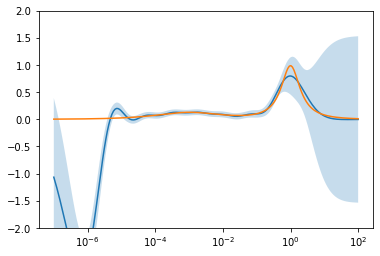

In [128]:
fig,ax = plt.subplots()
suffix = '_trunc_Macdonald_1.0.csv'
g_res = pd.read_csv(f'results/theta0=(0.1,0.5,1)/Gout{suffix}')
ax.plot(g_res['tau'],g_res['gamma'],label='New')
ax.fill_between(g_res['tau'],g_res['gamma']-g_res['sigma_gamma']*2,g_res['gamma']+g_res['sigma_gamma']*2,alpha=0.25)
ax.set_xscale('log')

ax.set_ylim(-2,2)

g_true = pd.read_csv('../../data/simulated/gamma_trunc.csv')
ax.plot(g_true['tau'],g_true['gamma'])

# Experimental data
## LIB

In [19]:
lib_files = ['../../data/experimental/DRTtools_LIB_data.txt',
             '../../data/experimental/DRTtools_LIB_data_qtr.csv'
            ]

theta0s = [[1e-4,1e-3,1],[5e-4,1e-3,1],[1e-4,2.5e-3,1],[1e-4,1e-3,2],[1e-4,5e-4,2],[1e-4,5e-4,1],
           [1e-4,5e-4,0.5],[1e-4,1e-3,0.5]]

f_plot = np.logspace(4,-5,200)
tau_plot = 1/(2*np.pi*f_plot)

start = time.time()
error_files = []
for file in lib_files:
    print(file)
    print('-------------------------')
    suffix = file[file.find('_'):-4]
    best_path = 'results/for_figs'
    Zoutbest = os.path.join(best_path,f'Zout{suffix}.csv')
    Goutbest = os.path.join(best_path,f'Gout{suffix}.csv')
    pklbest = os.path.join(best_path,f'obj{suffix}.pkl')
    
    if os.path.exists(Zoutbest) and os.path.exists(Goutbest) and os.path.exists(pklbest):
            print('Already ran')
    else:
        best_fun = np.inf
        file_start = time.time()
        for n,theta0 in enumerate(theta0s):
            print('theta0=',theta0)
            tsuf = suffix + '_theta0=({},{},{})'.format(theta0[0],theta0[1],theta0[2])
            Zoutfile = os.path.join('results/exp',f'Zout{tsuf}.csv')
            Goutfile = os.path.join('results/exp',f'Gout{tsuf}.csv')
            pkl = os.path.join('results/exp',f'obj{tsuf}.pkl')
            
            if file[-3:]=='txt':
                df = pd.read_csv(file,sep='\t',header=None)
                df = pd.DataFrame(df.values,columns=['Freq','Zreal','Zimag'])
            else:
                df = pd.read_csv(file)
            # sort ascending
            df = df.sort_values('Freq')
            Z = df['Zreal'].values + 1j*df['Zimag'].values
            try:
                result = gp_fit(df['Freq'].values,Z,theta0=theta0,freq_star=f_plot)
                Z_res = pd.DataFrame(np.array([df['Freq'],result['Z_re_fit'],result['Z_im_fit'],result['sigma_Z_im_fit']]).T,
                                 columns=['freq','Zreal','Zimag','sigma_im'])
                # sort by descending freq
                Z_res = Z_res.sort_values('freq',ascending=False,ignore_index=True)
                g_res = pd.DataFrame(np.array([tau_plot,result['gamma_star'],result['sigma_gamma_star']]).T,
                                     columns=['tau','gamma','sigma_gamma'])

                # save results files
                Z_res.to_csv(Zoutfile,index=False)
                g_res.to_csv(Goutfile,index=False)
                save_pickle(result,pkl)

                # if this theta0 improved the NMLL, write it to for_figs (overwrite existing file)
                if result['min_result']['fun'] < best_fun:
                    best_fun = result['min_result']['fun']
                    Z_res.to_csv(Zoutbest,index=False)
                    g_res.to_csv(Goutbest,index=False)
                    save_pickle(result,pklbest)
            except np.linalg.LinAlgError as lae:
                # cholesky failed for theta0. Can't evaluate NMLL, so no use in fitting
                print(lae)
                print('Can\'t evaluate NMLL for theta0. Skipping')
            
        print('File fit time:', time.time()-file_start)
        
print('Total fit time:',time.time()-start)

../../data/experimental/DRTtools_LIB_data.txt
-------------------------
theta0= [0.0001, 0.001, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0004366	0.0028997	 0.9999998  -778.814
Matrix is not positive definite
Choosing iteration with lowest NMLL: 1
Dumped pickle to results/exp\obj_LIB_data_theta0=(0.0001,0.001,1).pkl
Dumped pickle to results/for_figs\obj_LIB_data.pkl
theta0= [0.0005, 0.001, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
-0.0009916	0.0042089	 1.0000007  -710.461
Matrix is not positive definite
Choosing iteration with lowest NMLL: 1
Dumped pickle to results/exp\obj_LIB_data_theta0=(0.0005,0.001,1).pkl
theta0= [0.0001, 0.0025, 1]
Matrix is not positive definite
Cant evaluate NMLL for theta0. Skipping
theta0= [0.0001, 0.001, 2]
sigma_n,	  sigma_f,	 ell,		NMLL
0.0070414	0.0016639	 1.9999994  -516.914
Matrix is not positive definite
Choosing iteration with lowest NMLL: 1
Dumped pickle to results/exp\obj_LIB_data_theta0=(0.0001,0.001,2).pkl
theta0= [0.0001, 0.0005, 2]
sigma_n,	  sigma_f,	 ell

In [215]:
pkl = load_pickle('results/obj_LIB_data.pkl')
pkl['hyperparams']

{'sigma_n': -0.00043661806138679235,
 'sigma_f': 0.002899668139224341,
 'ell': 0.9999997504620132}

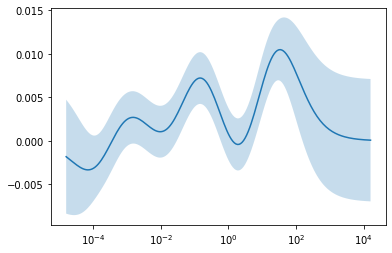

In [221]:
fig,ax = plt.subplots()
suffix = '_LIB_data_qtr.csv'
g_res = pd.read_csv(f'results/Gout{suffix}')
ax.plot(g_res['tau'],g_res['gamma'],label='New')
ax.fill_between(g_res['tau'],g_res['gamma']-g_res['sigma_gamma']*2,g_res['gamma']+g_res['sigma_gamma']*2,alpha=0.25)
ax.set_xscale('log')

# ax.set_ylim(-2,2)

# g_true = pd.read_csv('../../data/simulated/gamma_trunc.csv')
# ax.plot(g_true['tau'],g_true['gamma'])

In [225]:
Z_re = [np.trapz(g_res['gamma']/(1+(2*np.pi*f*g_res['tau'])**2),x=np.log(g_res['tau'])) for f in df['Freq'].values]

In [235]:
from scipy.optimize import curve_fit
def obj_fun(xdata,x):
    return Z_re + x
res = curve_fit(obj_fun,df['Freq'].values,df['Zreal'].values)

In [241]:
Z_res['Zreal'] = (Z_re + res[0])[::-1]

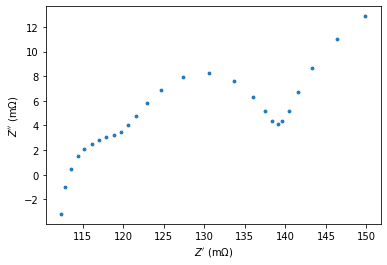

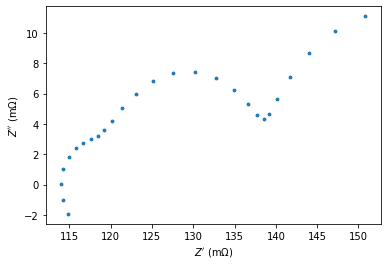

In [242]:
gt.plot_nyquist(df)
gt.plot_nyquist(Z_res)

## Protonic ceramic microelectrode

In [22]:
tco_file = '../../data/experimental/PDAC_COM3_02109_Contact10_2065C_500C.txt'
tco_df = gt.read_eis_zdata(tco_file)

f_plot_tco = np.logspace(7,-3,200)
tau_plot_tco = 1/(2*np.pi*f_plot_tco)

theta0s = [[5e5,1e6,1],[1e6,1e6,1],[1e6,2.5e6,1],[5e5,2.5e6,1],
          [5e5,1e6,2],[5e5,2.5e6,2],[1e6,1e6,2],[5e5,2.5e6,0.5]]

file = tco_file
suffix = '_PDAC'
Zoutbest = os.path.join('results/for_figs',f'Zout{suffix}.csv')
Goutbest = os.path.join('results/for_figs',f'Gout{suffix}.csv')
pklbest = os.path.join('results/for_figs',f'obj{suffix}.csv')

best_fun = np.inf
file_start = time.time()
for n,theta0 in enumerate(theta0s):
    print('theta0=',theta0)
    tsuf = suffix + '_theta0=({},{},{})'.format(theta0[0],theta0[1],theta0[2])
    Zoutfile = os.path.join('results/exp',f'Zout{tsuf}.csv')
    Goutfile = os.path.join('results/exp',f'Gout{tsuf}.csv')
    pkl = os.path.join('results/exp',f'obj{tsuf}.pkl')
    
    df = gt.read_eis_zdata(tco_file)
    # sort ascending
    df = df.sort_values('Freq')
    Z = df['Zreal'].values + 1j*df['Zimag'].values
    
    try:
        result = gp_fit(df['Freq'].values,Z,theta0=theta0,max_iter=10,freq_star=f_plot_tco)

        Z_res = pd.DataFrame(np.array([df['Freq'],result['Z_re_fit'],result['Z_im_fit'],result['sigma_Z_im_fit']]).T,
                             columns=['freq','Zreal','Zimag','sigma_im'])
        g_res = pd.DataFrame(np.array([tau_plot_tco,result['gamma_star'],result['sigma_gamma_star']]).T,
                             columns=['tau','gamma','sigma_gamma'])
        # sort by descending freq
        Z_res = Z_res.sort_values('freq',ascending=False,ignore_index=True)

        #save files
        Z_res.to_csv(Zoutfile,index=False)
        g_res.to_csv(Goutfile,index=False)
        save_pickle(result,pkl)
        
        # if this theta0 improved the NMLL, write it to for_figs (overwrite existing file)
        if result['min_result']['fun'] < best_fun:
            best_fun = result['min_result']['fun']
            Z_res.to_csv(Zoutbest,index=False)
            g_res.to_csv(Goutbest,index=False)
            save_pickle(result,pklbest)
    except np.linalg.LinAlgError as lae:
        # cholesky failed for theta0. Can't evaluate NMLL, so no use in fitting
        print(lae)
        print('Can\'t evaluate NMLL for theta0. Skipping')
    
        
print('File fit time:', time.time()-file_start)

theta0= [500000.0, 1000000.0, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
499999.9999773	1000000.0000009	 1.4992727  1415.252
499999.9999121	1000000.0000029	 2.0608005  1414.675
499999.9998102	1000000.0000060	 2.3661658  1414.610
499999.9997546	1000000.0000079	 2.3032102  1414.604
499999.9996921	1000000.0000099	 2.2993189  1414.604
Matrix is not positive definite
Choosing iteration with lowest NMLL: 5
Dumped pickle to results/exp\obj_PDAC_theta0=(500000.0,1000000.0,1).pkl
Dumped pickle to results/for_figs\obj_PDAC.csv
theta0= [1000000.0, 1000000.0, 1]
sigma_n,	  sigma_f,	 ell,		NMLL
999999.9999807	1000000.0000009	 1.5752927  1480.652
999999.9999249	1000000.0000027	 2.3310677  1480.186
999999.9998802	1000000.0000043	 2.2677631  1480.181
999999.9998341	1000000.0000060	 2.2674560  1480.181
999999.9978204	1000000.0000786	 2.2677604  1480.181
999999.9977742	1000000.0000803	 2.2674560  1480.181
999997.8765889	1000000.0765874	 2.2674560  1480.181
999997.8745559	1000000.0766607	 2.2677650  1480.181
999

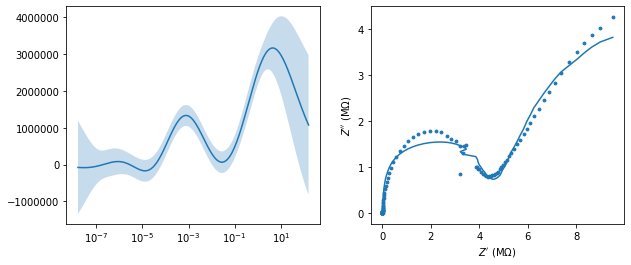

In [209]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
suffix = '_PDAC.csv'
g_res = pd.read_csv(f'results/Gout{suffix}')
axes[0].plot(g_res['tau'],g_res['gamma'],label='New')
axes[0].fill_between(g_res['tau'],g_res['gamma']-g_res['sigma_gamma']*2,g_res['gamma']+g_res['sigma_gamma']*2,alpha=0.25)
axes[0].set_xscale('log')

gt.plot_nyquist(df,ax=axes[1])
Z_res = pd.read_csv(f'results/Zout{suffix}')
Z_pred = df['Zreal'].values + 1j*Z_res['Zimag'].values
df_pred = gt.construct_eis_df(df['Freq'],Z_pred[::-1])
gt.plot_nyquist(df_pred,ax=axes[1],plot_func='plot')
# g_true = pd.read_csv('../../data/simulated/gamma_trunc.csv')
# ax.plot(g_true['tau'],g_true['gamma'])

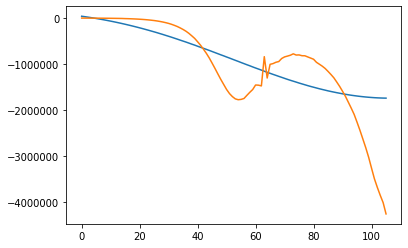

In [194]:
plt.plot(Z_res['Zimag'].values[::-1])
plt.plot(df['Zimag'].values[::-1])

In [91]:
for file in glob.glob('results/theta0=(0.1,0.5,1)/obj*'):
    fname = os.path.split(file)[1]
    circ = fname.split('_')[1]
    noise = fname[fname.find('_',4)+1:fname.find('.csv')]
    result = load_pickle(file)
    print(circ, noise,result['hyperparams'])

2RC Macdonald_0.25.pk {'sigma_n': -4.1480566153511305e-13, 'sigma_f': 0.47086742705017337, 'ell': 0.18715319796435878}
2RC Macdonald_1.0.pk {'sigma_n': -0.005890548482058003, 'sigma_f': 0.3882409315900495, 'ell': 0.30360030560511764}
2RC Macdonald_2.5.pk {'sigma_n': -0.016219732774145266, 'sigma_f': 0.3721020303084702, 'ell': 0.26381688701669964}
2RC noiseless.pk {'sigma_n': 5.145407773457837e-12, 'sigma_f': 0.48262218989199324, 'ell': 0.1798455392530458}
2RC Orazem_0.25.pk {'sigma_n': -0.0031498111477534403, 'sigma_f': 0.391977125359924, 'ell': 0.4272289503307818}
2RC Orazem_1.0.pk {'sigma_n': -0.017063616535135377, 'sigma_f': 0.3471867643249329, 'ell': 0.3087827747635174}
2RC Orazem_2.5.pk {'sigma_n': 0.04341602538873662, 'sigma_f': 0.31144830741393625, 'ell': 0.42528121832566385}
2RC uniform_0.25.pk {'sigma_n': -0.0038216402121491718, 'sigma_f': 0.764975226075985, 'ell': 0.35334793451674973}
2RC uniform_1.0.pk {'sigma_n': -0.020638866171523673, 'sigma_f': 0.6197065702493881, 'ell': 

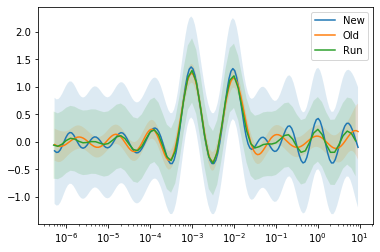

In [111]:
suffix = '_2RC_uniform_0.25.csv'
gres = pd.read_csv(f'results/theta0=(0.1,0.5,1)/Gout{suffix}')
gres = gres[(gres['tau']>=5e-7) & (gres['tau']<=10)]
ogres = pd.read_csv(f'results/theta0=(0.1,5,1)/Gout{suffix}')
ogres = ogres[(ogres['tau']>=5e-7) & (ogres['tau']<=10)]
run = pd.read_csv(f'results/Gout{suffix}')
run = run[(run['tau']>=5e-7) & (run['tau']<=10)]

fig,ax = plt.subplots()
ax.plot(gres['tau'],gres['gamma'],label='New')
ax.fill_between(gres['tau'],gres['gamma']-gres['sigma_gamma']*3,gres['gamma']+gres['sigma_gamma']*3,alpha=0.15)
ax.plot(ogres['tau'],ogres['gamma'],label='Old')
ax.fill_between(ogres['tau'],ogres['gamma']-ogres['sigma_gamma']**0.5*3,ogres['gamma']+ogres['sigma_gamma']**0.5*3,
                alpha=0.15)
ax.set_xscale('log')

ax.plot(run['tau'],run['gamma'],label='Run')
ax.fill_between(run['tau'],run['gamma']-run['sigma_gamma']*3,run['gamma']+run['sigma_gamma']*3,alpha=0.15)

ax.legend()

In [32]:
# print(file)
file = '../../data\Z_2ZARC_Macdonald_2.5.csv'
df = pd.read_csv(file)
# sort ascending
df = df.sort_values('Freq')
Z = (df['Zreal'].values + 1j*df['Zimag'].values)
result = gp_fit(df['Freq'].values,Z,freq_star=None)

sigma_n,   sigma_f,   ell
0.0124035  4.9999982  1.0000110
0.0141565  4.9999941  1.0000351
0.0148808  4.9999869  1.0000760
0.0146007  4.9490916  1.2877072
0.0147417  4.9490834  1.2877533
0.0146512  4.9201426  1.4502993
0.0145982  4.8555741  1.7960212
0.0146858  4.8555674  1.7960520
0.0147633  4.7737448  2.1700168
0.0148811  4.7737395  2.1700339
0.0151537  4.6930365  2.4327235
0.0181144  3.7277302  5.2374884
0.0159145  3.7277293  5.2374641
0.0163689  3.7277292  5.2374487
0.0162827  3.7267048  5.1639966
0.0163218  3.7267039  5.1639803
0.0161601  3.7179297  5.0112767
0.0161863  3.7179277  5.0112671
0.0161096  3.6945980  4.9028897
0.0159920  3.5779888  4.6536675
         Current function value: -249.808452
         Iterations: 20
         Function evaluations: 48
         Gradient evaluations: 131
         Hessian evaluations: 0


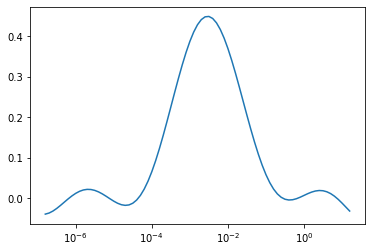

In [33]:
tau = 1/(2*np.pi*df['Freq'])
plt.plot(tau,result['gamma'])
# plt.plot(tau_plot,result['gamma_star'])
plt.xscale('log')

# plt.plot(df['Zimag'])
# plt.plot(result['Z_im_fit'])

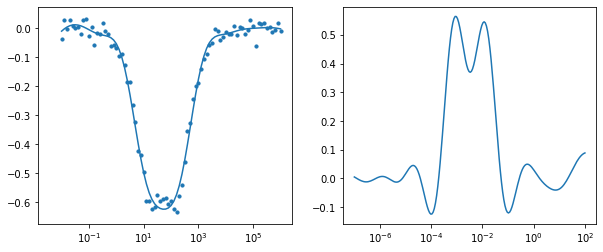

In [16]:
tf = '../../data\\Z_2RC_uniform_1.0.csv'
suffix = tf[tf.find('_'):]
tdf = pd.read_csv(tf)
Zr = pd.read_csv(os.path.join('results',f'Zout{suffix}'))
Gr = pd.read_csv(os.path.join('results',f'Gout{suffix}'))

fig,axes = plt.subplots(1,2,figsize=(10,4))

axes[0].scatter(tdf['Freq'],tdf['Zimag'],s=10)
axes[0].plot(tdf['Freq'],Zr['Zimag'])
axes[0].set_xscale('log')

axes[1].plot(Gr['tau'],Gr['gamma'])
axes[1].set_xscale('log')

In [37]:
df = pd.read_csv('Z_zarc.csv')
df['Z'] = df['Zreal'] + df['Zimag']*1j

def zarc_drt(t,t0,n):
    return (1/(2*np.pi))*np.sin((1-n)*np.pi)/(np.cosh(n*np.log(t/t0))-np.cos((1-n)*np.pi))

start = time.time()
result = gp_fit(df['Freq'].values,df['Z'].values)#,freq_star = np.logspace(-1,-3,31))
elapsed = time.time() - start
print('Fit time: {:.2f}'.format(elapsed))

sigma_n,   sigma_f,   ell
0.0020308  4.9637459  1.0179521
0.0019872  4.8272976  2.1297408
0.0020147  4.8272975  2.1297414
Optimization terminated successfully.
         Current function value: -362.500846
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 27
         Hessian evaluations: 0
Fit time: 28.22


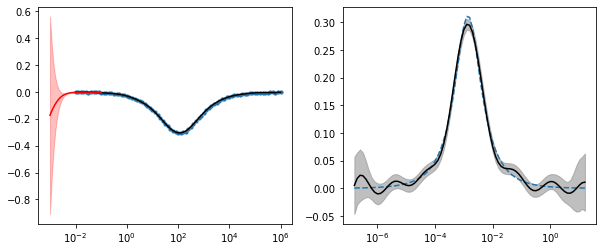

In [22]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

axes[0].scatter(df['Freq'],df['Zimag'],s=10)
axes[0].plot(df['Freq'],result['Z_im_fit'],c='k')
axes[0].fill_between(df['Freq'],result['Z_im_fit']-2*result['sigma_Z_im_fit'],result['Z_im_fit']+2*result['sigma_Z_im_fit'],
             alpha=0.5,color='grey')

freq_star = np.logspace(-1,-3,31)
axes[0].plot(freq_star,result['Z_im_star'],c='r')
axes[0].fill_between(freq_star,result['Z_im_star']-2*result['sigma_Z_im_star'],result['Z_im_star']+2*result['sigma_Z_im_star'],
             alpha=0.25,color='r')
axes[0].set_xscale('log')

tau = 1/(2*np.pi*df['Freq'])
axes[1].plot(tau,zarc_drt(tau,(1e-2)**(1/0.7),0.7),ls='--',label='Exact')
axes[1].plot(tau,result['gamma'],c='k')
axes[1].fill_between(tau,result['gamma']-2*result['sigma_gamma'],result['gamma']+2*result['sigma_gamma'],
                     alpha=0.5,color='grey')
# axes[1].plot(tau*2*np.pi,result['gamma_star'])

axes[1].set_xscale('log')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BE3900A88>,
      dtype=object)

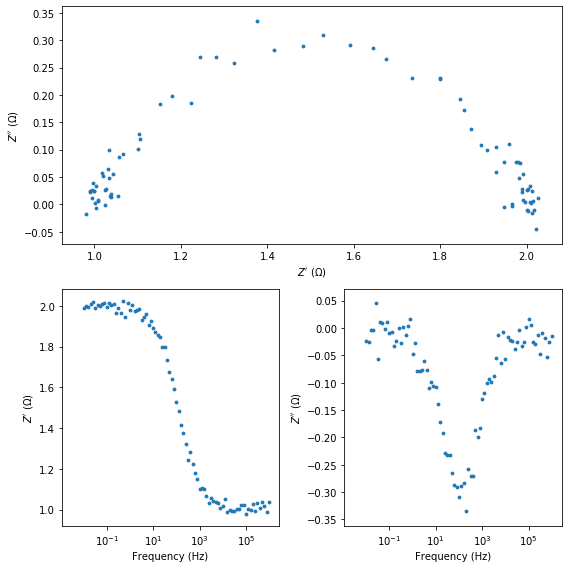

In [28]:
gt.plot_full_eis(df,bode_cols=['Zreal','Zimag'])

In [31]:
result

{'gamma': array([-6.30281171e-02, -5.81055876e-02, -4.07762541e-02, -1.63166051e-02,
         9.06619855e-03,  2.96989953e-02,  4.17064421e-02,  4.37622202e-02,
         3.71513918e-02,  2.51544611e-02,  1.19499862e-02,  1.36427753e-03,
        -4.16628507e-03, -4.12542430e-03,  1.96485344e-04,  6.39592691e-03,
         1.19868562e-02,  1.54225753e-02,  1.67697498e-02,  1.78105213e-02,
         2.15359313e-02,  3.11932122e-02,  4.91960621e-02,  7.62524129e-02,
         1.10992933e-01,  1.50218662e-01,  1.89682391e-01,  2.25144059e-01,
         2.53354509e-01,  2.72654238e-01,  2.83013649e-01,  2.85541059e-01,
         2.81675097e-01,  2.72391619e-01,  2.57750082e-01,  2.36978873e-01,
         2.09094646e-01,  1.73837384e-01,  1.32557297e-01,  8.86677005e-02,
         4.73953281e-02,  1.47842235e-02, -3.82926472e-03, -5.44166765e-03,
         9.40704874e-03,  3.62761557e-02,  6.75342557e-02,  9.40412843e-02,
         1.07404909e-01,  1.02213898e-01,  7.76191908e-02,  3.77858371e-02,
   